In [10]:
!wget https://raw.githubusercontent.com/owsei-data/coffe-quality/refs/heads/main/data/df_arabica_clean.csv

--2025-11-14 13:11:57--  https://raw.githubusercontent.com/owsei-data/coffe-quality/refs/heads/main/data/df_arabica_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112964 (110K) [text/plain]
Saving to: ‘df_arabica_clean.csv’

df_arabica_clean.cs 100%[===================>] 110.32K  --.-KB/s    in 0.01s   

2025-11-14 13:11:57 (9.37 MB/s) - ‘df_arabica_clean.csv’ saved [112964/112964]



In [86]:
import pandas as pd

coffee = pd.read_csv('df_arabica_clean.csv')

In [87]:
coffee.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [88]:
colunas_remover = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
           'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
           'ID', 'Farm Name', 'Lot Number', 'Mill', 'ICO Number',
           'Company', 'Producer', 'Bag Weight', 'In-Country Partner',
           'Grading Date', 'Owner', 'Status', 'Expiration',
           'Certification Body', 'Certification Address',
           'Certification Contact', 'Unnamed: 0', 'Harvest Year',
           'Number of Bags']

coffee_clean = coffee.drop(columns=colunas_remover)

In [89]:
coffee_clean.columns

Index(['Country of Origin', 'Altitude', 'Region', 'Variety',
       'Processing Method', 'Total Cup Points', 'Moisture Percentage',
       'Category One Defects', 'Quakers', 'Color', 'Category Two Defects'],
      dtype='object')

In [90]:
coffee_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     207 non-null    object 
 1   Altitude              206 non-null    object 
 2   Region                205 non-null    object 
 3   Variety               201 non-null    object 
 4   Processing Method     202 non-null    object 
 5   Total Cup Points      207 non-null    float64
 6   Moisture Percentage   207 non-null    float64
 7   Category One Defects  207 non-null    int64  
 8   Quakers               207 non-null    int64  
 9   Color                 207 non-null    object 
 10  Category Two Defects  207 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 17.9+ KB


In [91]:
import re
import numpy as np

def limpar_altitude(valor):
    if pd.isna(valor):
        return np.nan

    s = str(valor)

    nums = re.findall(r'\d+\.?\d*', s)

    if not nums:
        return np.nan

    nums_como_float = [float(n) for n in nums]

    return np.mean(nums_como_float)

coffee_clean['Altitude'] = coffee_clean['Altitude'].apply(limpar_altitude)

In [92]:
colunas_nulos = ['Altitude', 'Region', 'Variety', 'Processing Method']
coffee_clean.dropna(subset=colunas_nulos, inplace=True)

In [93]:
coffee_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 206
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     196 non-null    object 
 1   Altitude              196 non-null    float64
 2   Region                196 non-null    object 
 3   Variety               196 non-null    object 
 4   Processing Method     196 non-null    object 
 5   Total Cup Points      196 non-null    float64
 6   Moisture Percentage   196 non-null    float64
 7   Category One Defects  196 non-null    int64  
 8   Quakers               196 non-null    int64  
 9   Color                 196 non-null    object 
 10  Category Two Defects  196 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 18.4+ KB


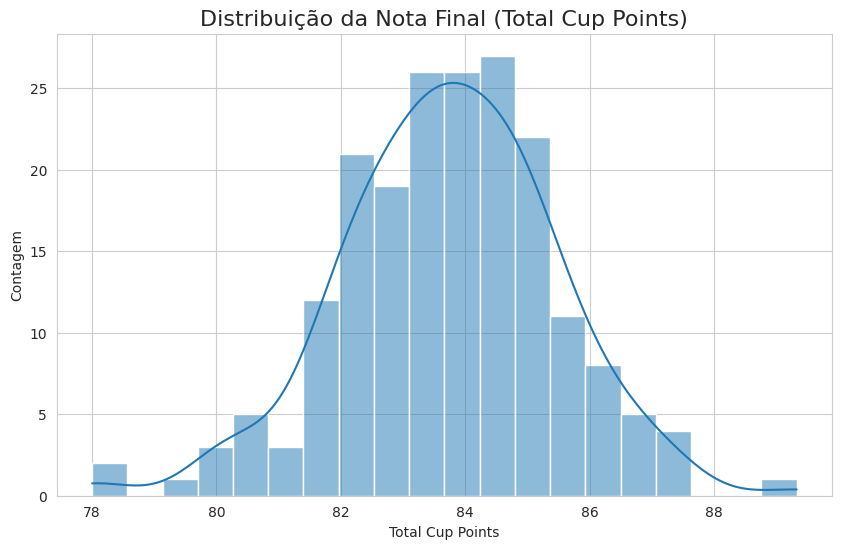

count    196.000000
mean      83.726224
std        1.728620
min       78.000000
25%       82.580000
50%       83.790000
75%       84.830000
max       89.330000
Name: Total Cup Points, dtype: float64


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid") #estilo

#hitsplot de y
plt.figure(figsize=(10, 6))
sns.histplot(coffee_clean['Total Cup Points'], bins=20, kde=True)
plt.title('Distribuição da Nota Final (Total Cup Points)', fontsize=16)
plt.xlabel('Total Cup Points')
plt.ylabel('Contagem')
plt.show()

#describe de y
print(coffee_clean['Total Cup Points'].describe())

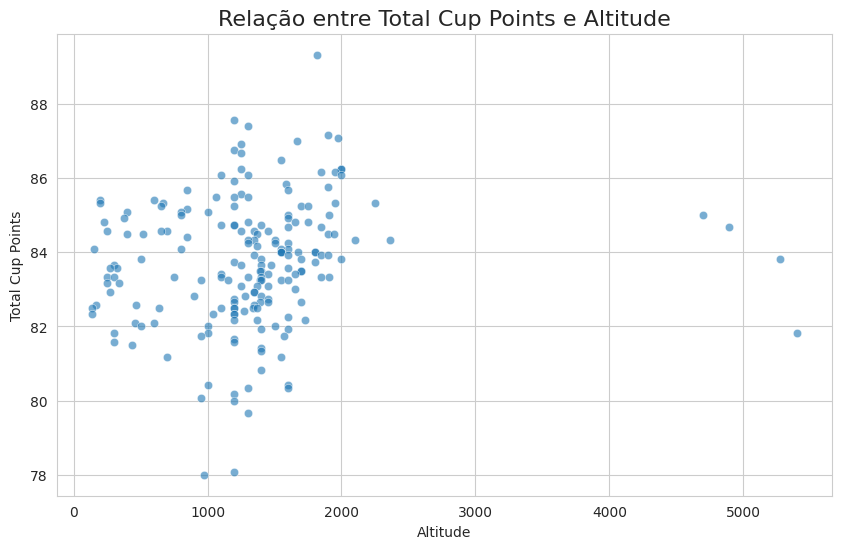

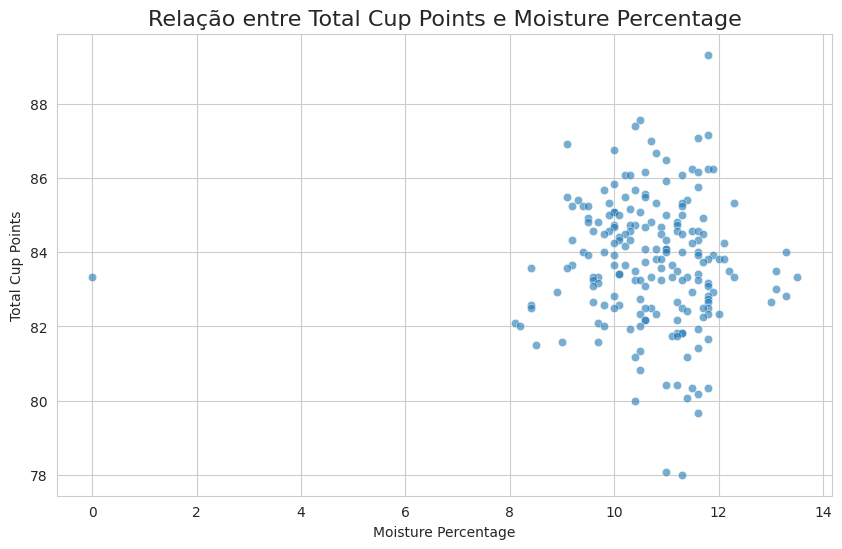

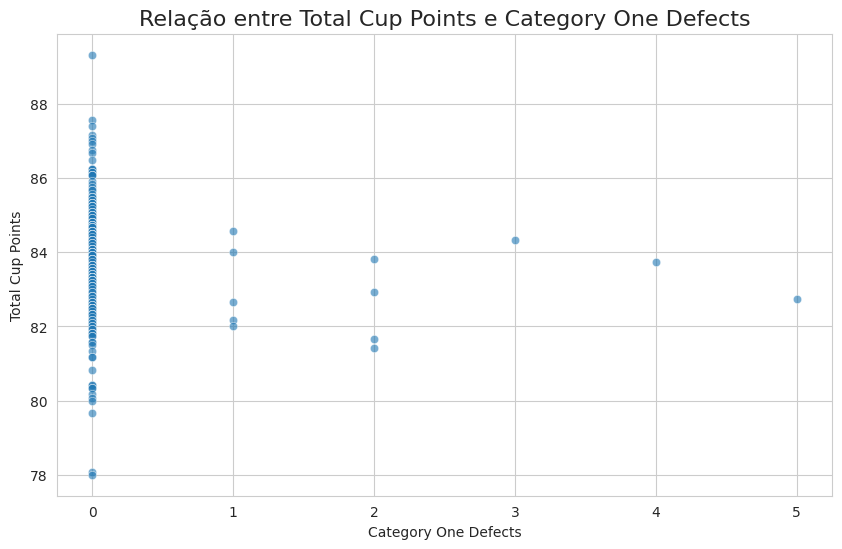

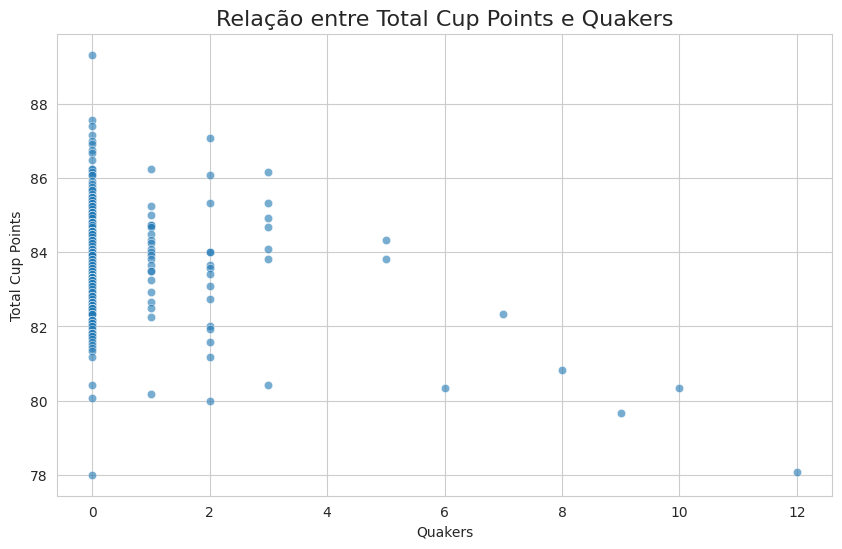

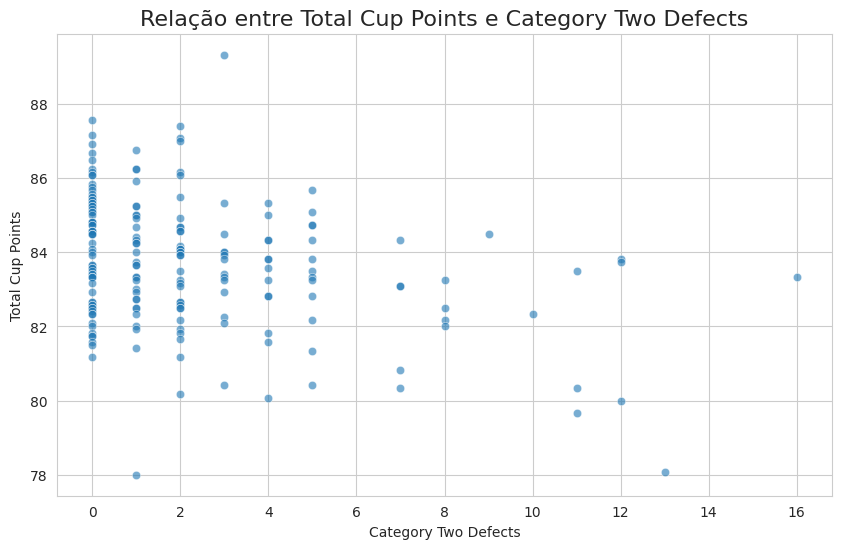

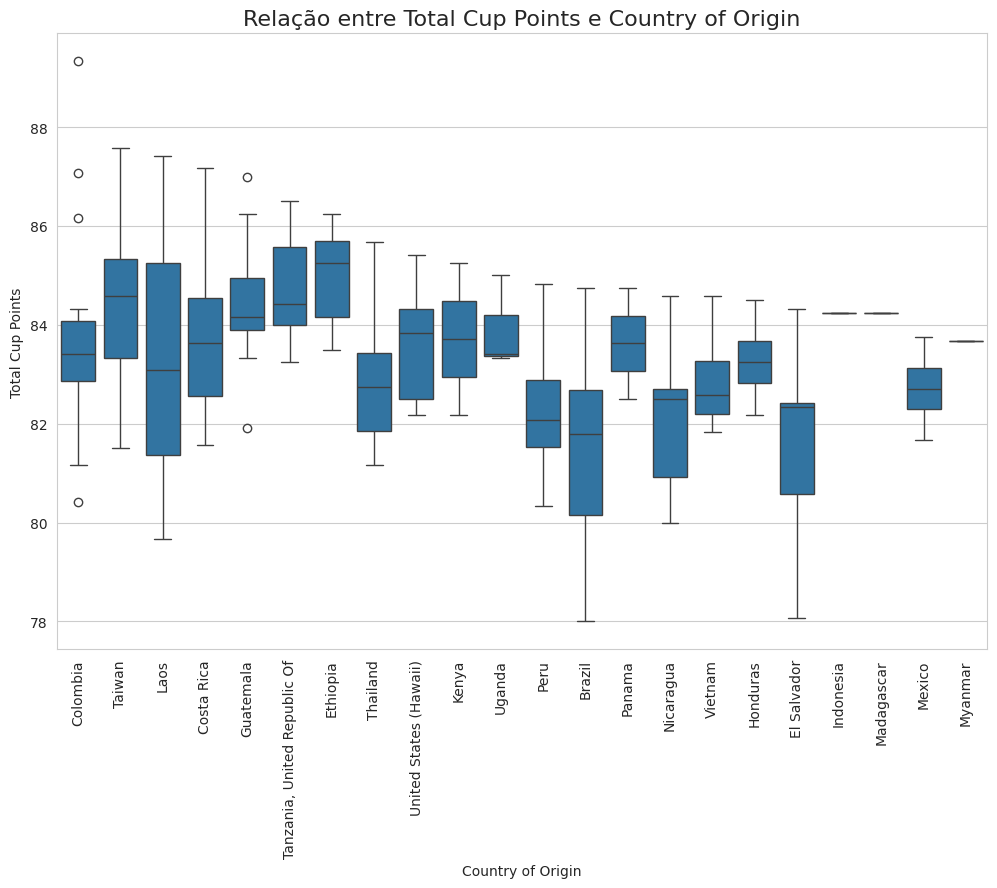

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37109 (\N{CJK UNIFIED IDEOGRAPH-90F5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36958 (\N{CJK UNIFIED IDEOGRAPH-905E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34399 (\N{CJK UNIFIED IDEOGRAPH-865F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21331 (\N{CJK UNIFIED IDEOGRAPH-5353}) missing from font(s) DejaVu Sans.
  fig.canvas

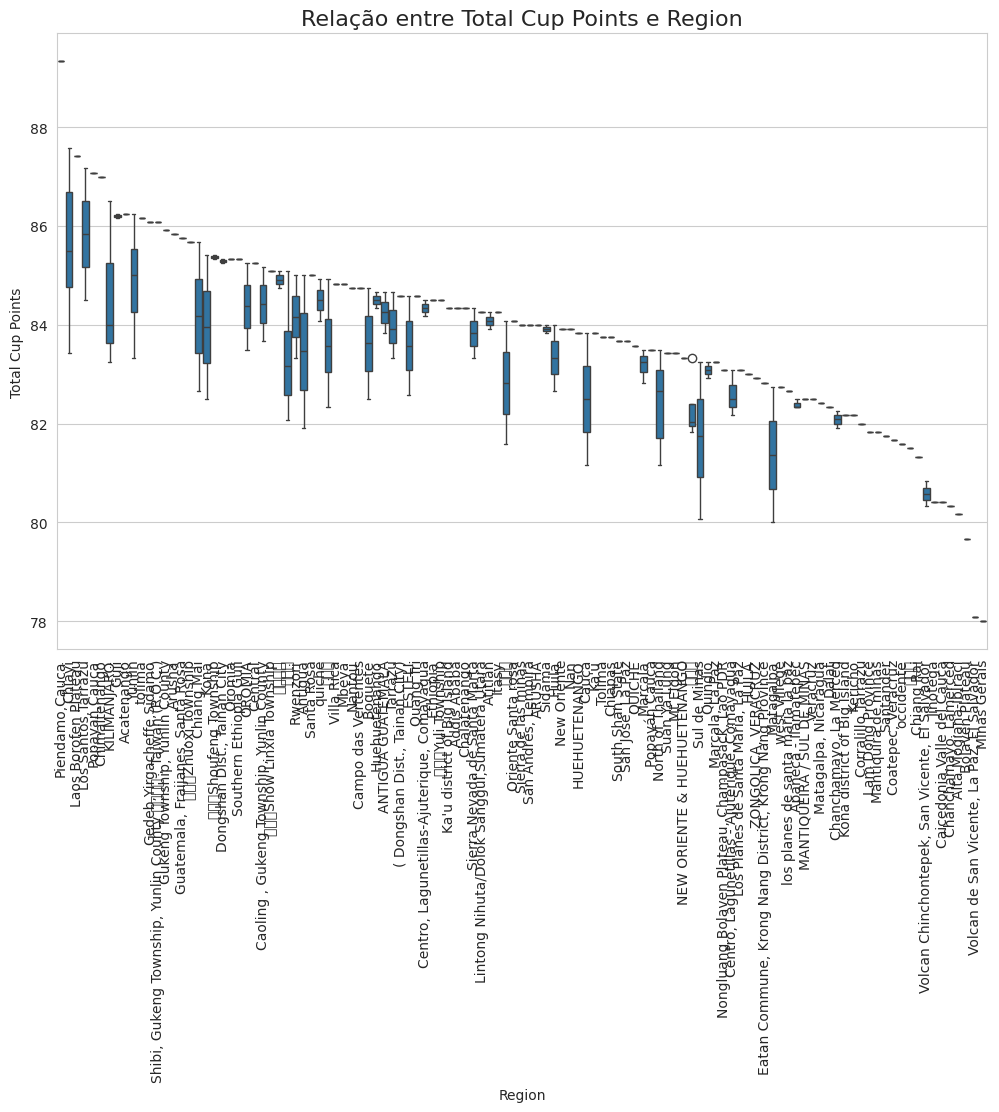

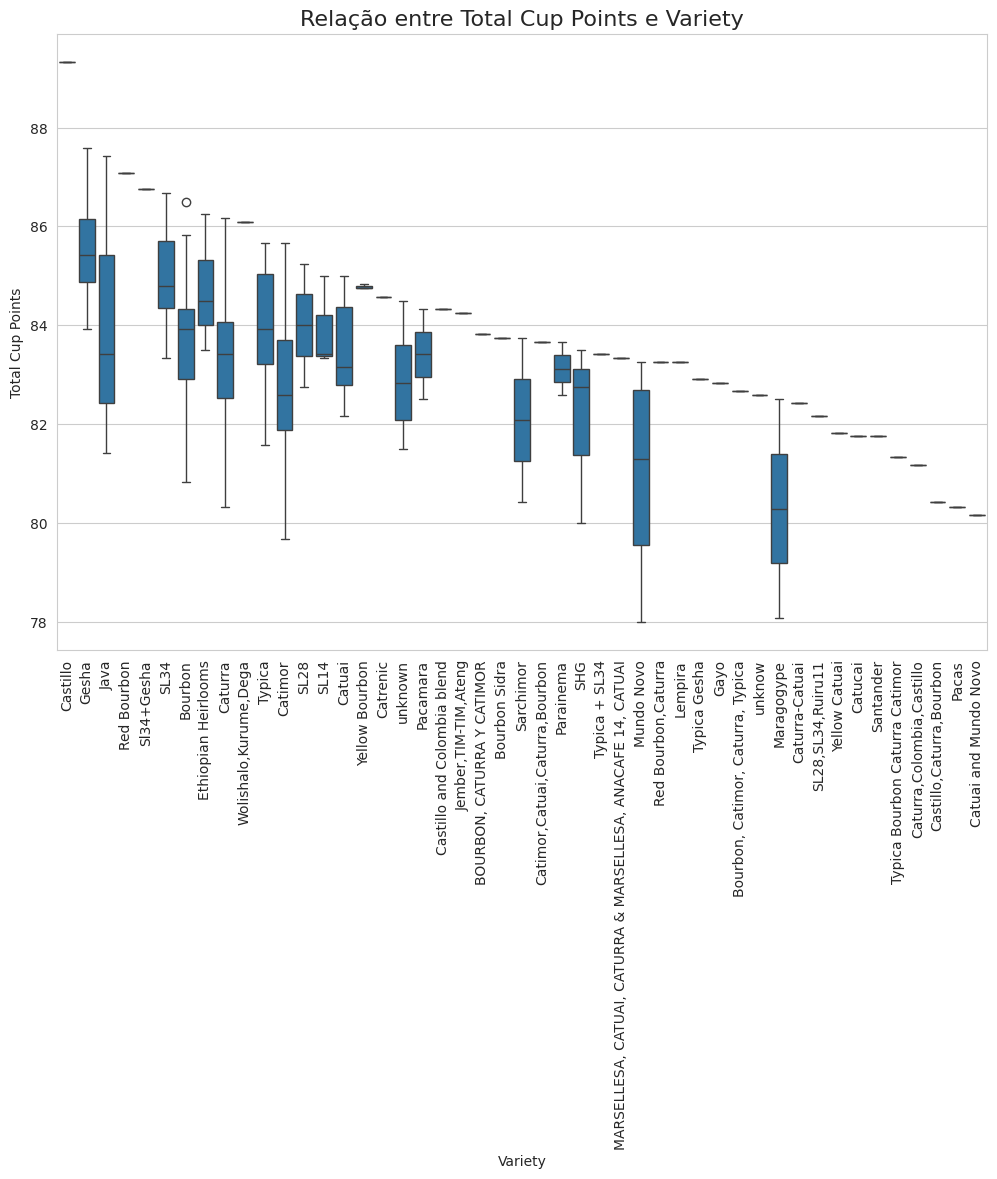

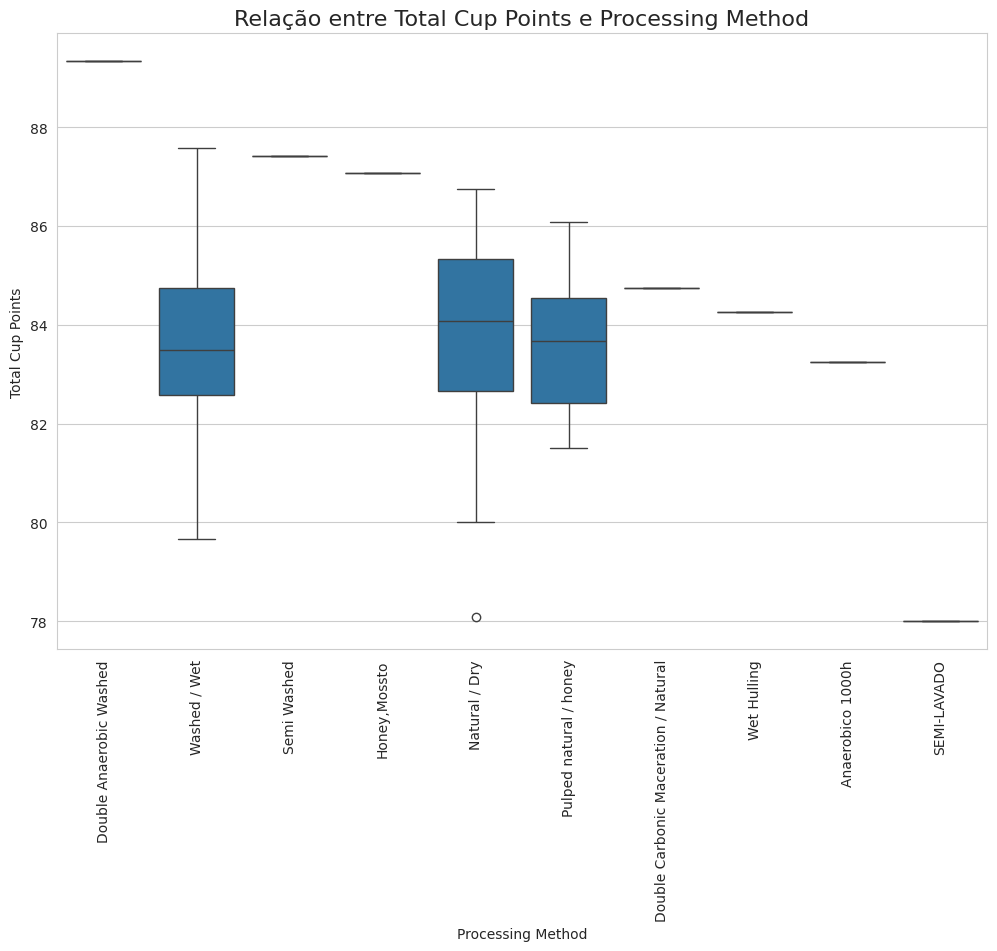

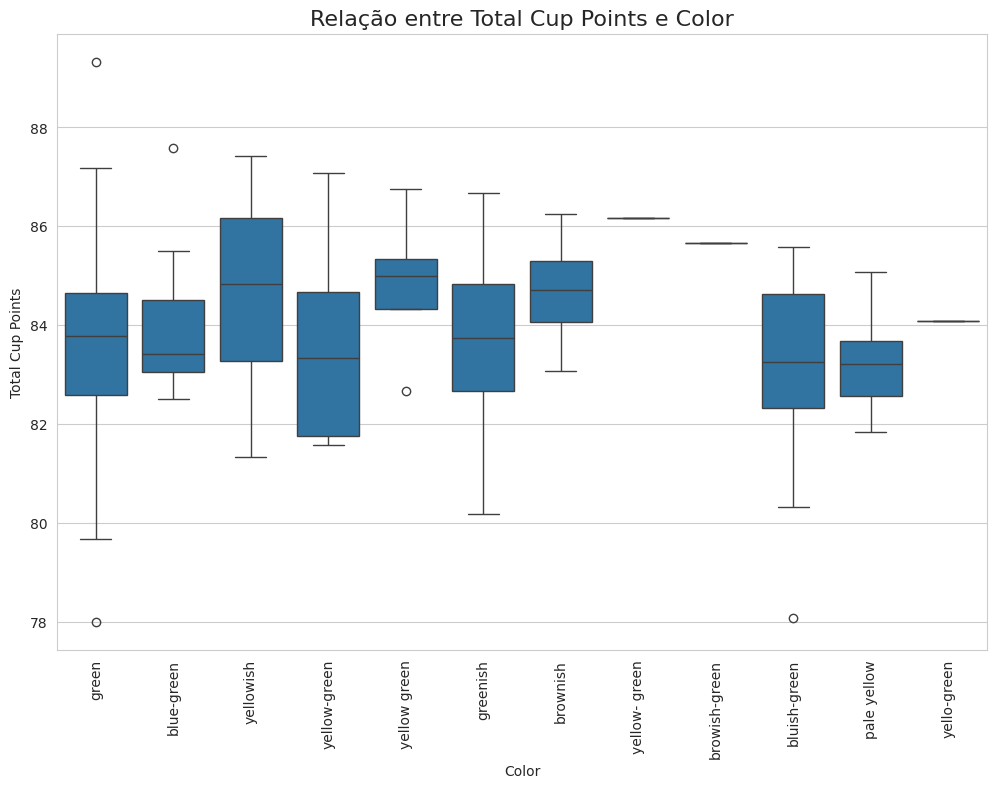

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

alvo_y = 'Total Cup Points'

features_numericas = [
    'Altitude',
    'Moisture Percentage',
    'Category One Defects',
    'Quakers',
    'Category Two Defects'
]

features_categoricas = [
    'Country of Origin',
    'Region',
    'Variety',
    'Processing Method',
    'Color'
]



for col_num in features_numericas:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=coffee_clean,
        x=col_num,
        y=alvo_y,
        alpha=0.6
    )
    plt.title(f'Relação entre {alvo_y} e {col_num}', fontsize=16)
    plt.xlabel(col_num)
    plt.ylabel(alvo_y)
    plt.show()


for col_cat in features_categoricas:
    plt.figure(figsize=(12, 8))

    sns.boxplot(
        data=coffee_clean,
        x=col_cat,
        y=alvo_y
    )

    plt.title(f'Relação entre {alvo_y} e {col_cat}', fontsize=16)
    plt.xlabel(col_cat)
    plt.ylabel(alvo_y)

    plt.xticks(rotation=90)

    plt.show()

In [96]:
colunas_remover = ['Region', 'Color']

coffee_clean = coffee_clean.drop(columns=colunas_remover)

In [97]:
coffee_clean.columns

Index(['Country of Origin', 'Altitude', 'Variety', 'Processing Method',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Category Two Defects'],
      dtype='object')

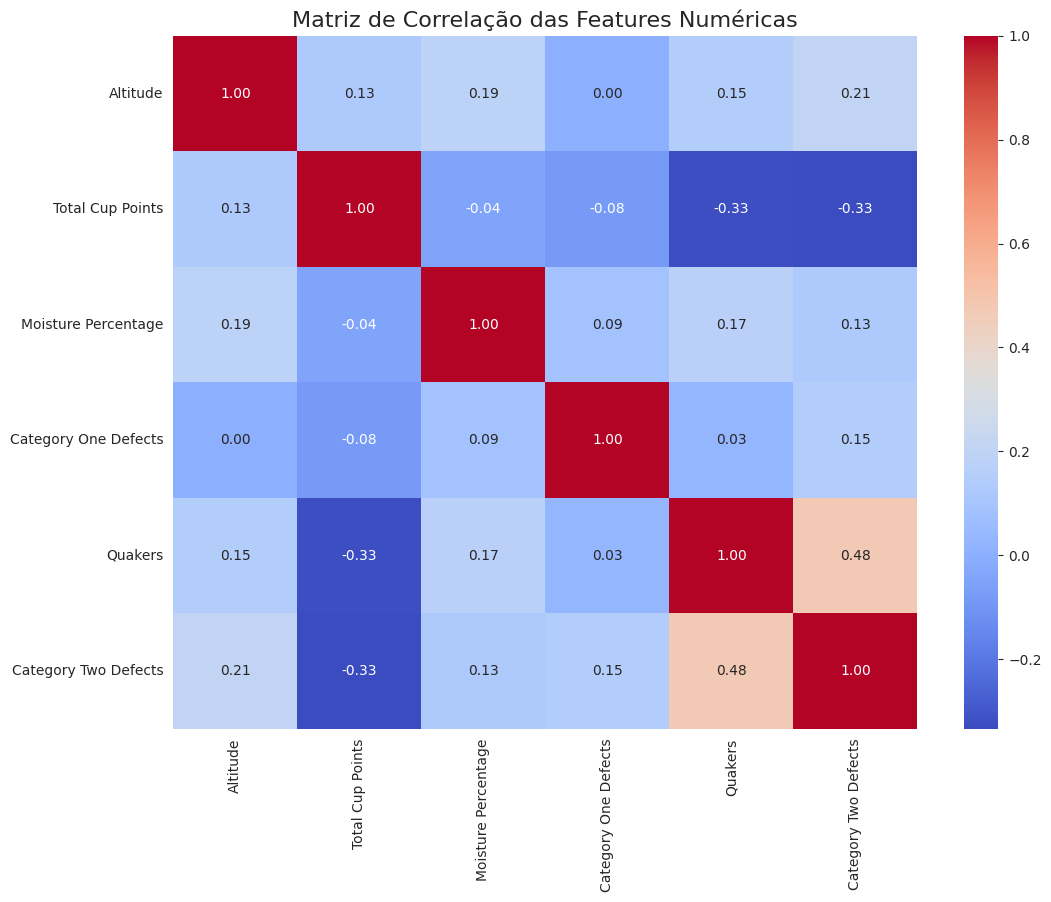

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

colunas_numericas = coffee_clean.select_dtypes(include=['float64', 'int64'])

matriz_corr = colunas_numericas.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(
    matriz_corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Matriz de Correlação das Features Numéricas', fontsize=16)
plt.show()

In [100]:
coffee_clean.to_csv('coffee_eda.csv')